In [10]:
%run ../../common/import_all.py

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython

from sklearn.linear_model import LinearRegression

config_ipython()
setup_matplotlib()
set_css_style()

# Linear Regression

## What is it

A linear regression models the relationship between a dependent variable and one (*simple linear regression*) or more (*multiple linear regression*) independent variables using a linear predictor, that is, the assumption is that the relationship between them is linear.

### Simple

In the simple one-dimensional case, we are modelling the dependency as

$$
y = \alpha + \beta x \ ,
$$

$\alpha$ (the slope of the line) and $\beta$ (the intercept) being the coefficients we want to compute. What we mean by this is that in reality we assume 

$$
y = \alpha + \beta x + \epsilon \ ,
$$

expecting the error $\epsilon$ to be "small".


### Multiple

In the case of a multiple linear regression, we would have the line (let's say we have $p$ variables, that is, features):

$$
y = w_0 + \mathbf{w} \cdot \mathbf{x} \ ,
$$

where $\mathbf{w}$ is the vector of paramters

$$
\mathbf w = [w_1, w_2, \ldots, w_p] \ ,
$$

and $\mathbf{x}$ the features

$$
\mathbf x =
    \begin{bmatrix}
         x_1\\
         x_2\\
         \ldots\\
         x_p
 \end{bmatrix} \ .
$$

For convenience, we can write the model as

$$
y = \mathbf w \cdot \mathbf x \ ,
$$

where we have set $x_0 = 1$.

Because we would have several (let's say $n$) observations (sample data points), each $x_j$ and each $y_j$, where $j \in \{1, \ldots ,p\}$, is a vector in $\mathbb R^n$, so we will denote the $j$th feature of the $i$th sample by $x_i^j$, the $j$th coefficient by $w_j$ and the target variable of the $i$th sample by $y_i$.

## Estimators: Ordinary Least Squares (OLS)

The problem is that of estimating the parameters which suit the assumption of the model. There are several methods to do that; OLS is the most commonly used method and indeed the simplest one.

The *cost function* of an OLS is given by the sum of the squared residuals between the vector of the real dependent variables and the model predictions:

$$
E(\mathbf w) = \sum_{i=1}^{i=n} (y_i - \mathbf w_i \cdot \mathbf x_i)^2
$$

(the vector operations are in the features space). In extended form, the cost function is

$$
E(\mathbf w) = \sum_{i=1}^{i=n} \Big(y_i - \sum_{j=1}^{j=p} w_j x_i^j\Big)^2 \ ,
$$

or, in a short form,

$$
E(\mathbf w) = ||y - \mathbf w \cdot \mathbf x||^2
$$

This function has to be minimised over the parameters, so the becomes solving

$$
\min_{\mathbf w} E(\mathbf w)
$$

which can be tackled via [Gradient Descent](../../algorithms/gradient-descent.ipynb).

If for the sake of simplicity we put ourselves in just one dimension (one feature, so that $x$ is a single variable), we would have

$$
E(\alpha, \beta) = \sum_{i=0}^{i=n} (y_i - (\alpha x_i + \beta))^2
$$

so we'd have to solve the problem

$$
\min_{\alpha, \beta} E(\alpha, \beta)
$$

which, by the Gradient Descent method translates into solving the system

$$
\begin{cases} 
    \frac{\partial E}{\partial \alpha} = 2 \sum_{i=0}^{i=n} (y_i - (\alpha x_i + \beta))(-x_i) \\ 
     \frac{\partial E}{\partial \beta} = 2 \sum_{i=0}^{i=n} (\alpha x_i + \beta - y_i)
\end{cases}
$$   

### An example
 
We'll use the [sklearn implementation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on the head size/brain weight dataset. 

In [28]:
df = pd.read_csv('../../datasets/head_size_brain_weight.csv')

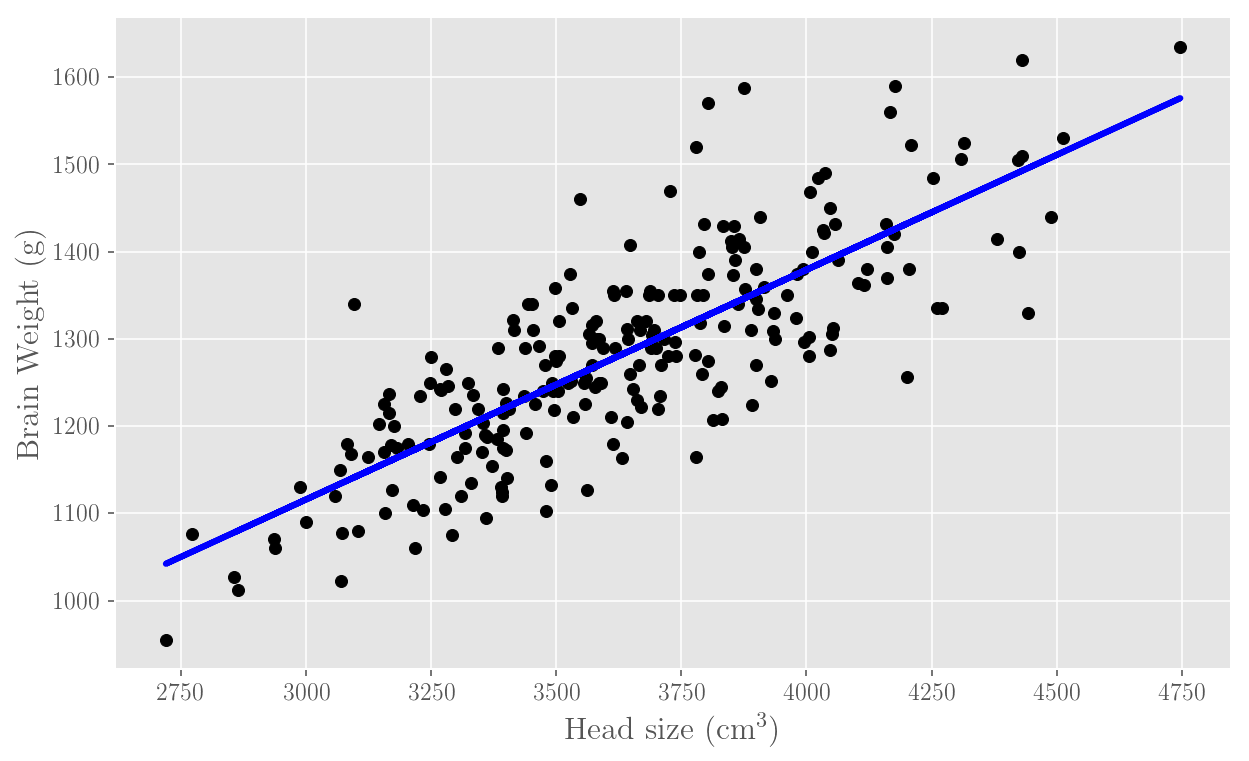

Slope of the fit:  [ 0.26342934]
Intercept of the fit:  325.573421049


In [34]:
# Num samples
n = df.count()['Head_size(cm^3)']

# Invoking the regressor (fit the intercept as well)
lr = LinearRegression(fit_intercept=True)

# Getting x as head size columns and y as brain weight column
# Reshaping x from (num_rows,) to (num_rows,1) for the regressor fit to work 
# (needed when using only one feature as fit method expects a matrix)
x = df['Head_size(cm^3)'].as_matrix().reshape(n, 1)
y = df['Brain_weight(g)'].as_matrix()

# Fit the model
fit = lr.fit(x, y)

# Plot the data and the fitting line
# Change the label index in the header_index key
plt.scatter(x, y, color='black');
plt.plot(x, fit.predict(x), color='blue')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain Weight (g)')
plt.show();

# Display the fitted slope and intercept of the fitting line
print('Slope of the fit: ', fit.coef_)
print('Intercept of the fit: ', fit.intercept_)

## References

1. <a name="ng"></a> [Notes on linear regression from the Stanford ML course by A Ng](http://cs229.stanford.edu/notes/cs229-notes1.pdf)